# Aplicación de validación cruzada

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Enero de 2025   
**Versión:** 1.0  

---

## Descripción

Este notebook contiene la explicación de la técnica de validación cruzada en un problema de clasificación.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# CROSS VALIDATION

En este ejemplo se utiliza el algoritmo k-Vecinos más cercanos para predecir si los pacientes tienen diabetes o no.

Se compara el valor de K-vecinos usando una validación entrenamiento/test y luego se aplica **Cross Validation** para ver si ese valor cambia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

plt.style.use('ggplot')

In [2]:
!wget https://www.dropbox.com/s/lus9jhalh6j65qt/diabetes.csv

--2025-01-20 00:38:22--  https://www.dropbox.com/s/lus9jhalh6j65qt/diabetes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/6ngpmrhofnz5fqf86efv5/diabetes.csv?rlkey=qndgwm5jvy70qf02wzlcbac11 [following]
--2025-01-20 00:38:22--  https://www.dropbox.com/scl/fi/6ngpmrhofnz5fqf86efv5/diabetes.csv?rlkey=qndgwm5jvy70qf02wzlcbac11
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9fb6ef14599de4a45ef53c605b.dl.dropboxusercontent.com/cd/0/inline/Cijpp75ZryLesqaIGj3OulFLPg3LigJYNyH8C2ckz4Lgq6hYA-nV0pBPP2TDWcL1eKkeklidDZ80pByiodufJb_aBSRBi9BO3yE_rdFgw8AgoXcv2BzOK25CAjb4Q2RdTNhR9tTIXoGHUB_KLtQayQ88/file# [following]
--2025-01-20 00:38:23--  https://uc9fb6ef14599de4a45ef53c605b.dl.dropboxusercontent.com/cd/0/inline/C

In [3]:
# Carga los datos
df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Revisa el tamaño del dataframe
df.shape

(768, 9)

Como se observó anteriormente, se tienen 768 filas y 9 columnas. Las primeras 8 columnas representan las características y la última columna representa el objetivo/etiqueta.

In [5]:
# Selecciona la variable dependiente y las independientes
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Se dividen los datos aleatoriamente en conjuntos de entrenamiento y de prueba.

Se ajusta/entrena un clasificador en el conjunto de entrenamiento y se hacen predicciones en el conjunto de prueba. Luego se comparan las predicciones con las etiquetas conocidas.



Es una buena práctica realizar la división de tal manera que refleje las etiquetas de los datos. En otras palabras, es ideal que las etiquetas se dividan en el conjunto de entrenamiento y prueba tal como están en el conjunto de datos original. Entonces se usa el argumento que permite estratificar.

También se crea un conjunto de prueba de un tamaño de el 20% del conjunto de datos.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=29, stratify=y)

Se crea un clasificador usando el algoritmo k-vecinos más cercanos.



```
modelo = KNeighborsClassifier(n_neighbors=k)
```



Primero se experimenta para diferentes valores de k.

In [7]:
# Configura matrices para almacenar la precisión de las pruebas y el entrenamiento
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
  # Crea el modelo
  knn = KNeighborsClassifier(n_neighbors=k)

  # Entrena el modelo
  knn.fit(X_train, y_train)

  # Calcula la exactitud en entrenamiento
  train_accuracy[i] = knn.score(X_train, y_train)

  # Calcula la exactitud con test
  test_accuracy[i] = knn.score(X_test, y_test)

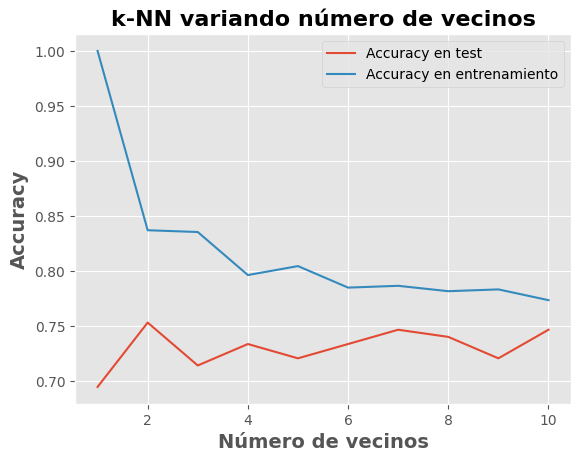

In [8]:
# Genera un gráfico con las iteraciones con diferentes K vs la exactitud
plt.title('k-NN variando número de vecinos', fontsize=16, fontweight="bold")
plt.plot(neighbors, test_accuracy, label='Accuracy en test')
plt.plot(neighbors, train_accuracy, label='Accuracy en entrenamiento')
plt.legend()
plt.xlabel('Número de vecinos', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.show()

In [9]:
# Obtiene mejor accuracy
print(np.max(test_accuracy))
print(np.argmax(test_accuracy))

0.7532467532467533
1


Se puede observar arriba que se obtiene la máxima precisión de prueba para k = 2. Entonces, se creará un KNeighborsClassifier con un número de vecinos de 2.

In [10]:
# Setea el clasificador con 8 vecinos
knn = KNeighborsClassifier(n_neighbors=neighbors[np.argmax(test_accuracy)])

In [11]:
# Entrena
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
# Genera el valor del SCORE del modelo
knn.score(X_test,y_test)

0.7532467532467533

**Confusion Matrix**

Una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación (o "clasificador") en un conjunto de datos de prueba cuyos valores verdaderos se conocen.

In [13]:
# Realiza predicciones
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[96,  4],
       [34, 20]])

La matriz de confusión también se puede obtener mediante el método de crosstab de pandas.

In [15]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,96,4,100
1,34,20,54
All,130,24,154


**Classification Report**

Otro informe importante es el informe de Clasificación. Es un resumen de texto de la precisión, recuperación y puntuación F1 de cada clase.

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       100
           1       0.83      0.37      0.51        54

    accuracy                           0.75       154
   macro avg       0.79      0.67      0.67       154
weighted avg       0.77      0.75      0.72       154



**Cross Validation**

Ahora, antes de entrar en detalles sobre el ajuste de hiperparámetros, es necesario comprender el concepto de validación cruzada.

El rendimiento del modelo entrenado depende de la forma en que se dividen los datos. Puede que no sea representativo de la capacidad del modelo para generalizar.

La solución es la validación cruzada.

La validación cruzada es una técnica para evaluar modelos predictivos dividiendo la muestra original en un conjunto de entrenamiento para entrenar el modelo y un conjunto de prueba para evaluarlo.

En la validación cruzada de k veces, la muestra original se divide aleatoriamente en k submuestras de igual tamaño. De las k submuestras, una única submuestra se conserva como datos de validación para probar el modelo, y las k-1 submuestras restantes se utilizan como datos de entrenamiento. Luego, el proceso de validación cruzada se repite k veces (los pliegues), y cada una de las k submuestras se usa exactamente una vez como datos de validación. Los k resultados de los pliegues pueden luego promediarse (o combinarse de otro modo) para producir una estimación única. **La ventaja de este método es que todas las observaciones se utilizan tanto para el entrenamiento como para la validación, y cada observación se utiliza para la validación exactamente una vez.**

**Hyperparameter tuning**

El valor de k que se seleccionó anteriormente se seleccionó observando la curva de precisión frente al número de vecinos. Ésta es una forma primitiva de ajuste de hiperparámetros.

Hay una mejor manera de hacerlo que implica:

1. Probar varios valores de hiperparámetros diferentes.

2. Montarlos todos por separado

3. Comprobar qué tan bien se desempeña cada uno

4. Elegir el que tenga mejor rendimiento

5. Usar validación cruzada siempre

Se usará **GridSearchCV** de la librería Scikitlearn para busacr el mejor valor de K aplicando simultáneamente Cross Validation



In [17]:
# En el caso de un clasificador como knn, el parámetro a ajustar es n_neighbors
param_grid = {'n_neighbors': np.arange(1,50)}

In [18]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
knn_cv.best_score_

0.7578558696205755

El valor de exactitud anterior fue de 0.7532, menor al encontrado con GridSearchCV (0.7578558696205755) que usa Cross Validation. Se revisa si cambia el número de K vecinos...

In [20]:
knn_cv.best_params_

{'n_neighbors': 14}

In [21]:
knn_cv.cv_results_

{'mean_fit_time': array([0.0069839 , 0.00668554, 0.00679059, 0.00645332, 0.0027535 ,
        0.00218625, 0.00436773, 0.00218077, 0.00581732, 0.003128  ,
        0.00487037, 0.00968566, 0.00627837, 0.00222282, 0.00576954,
        0.00787401, 0.0048492 , 0.00667305, 0.00204115, 0.00210166,
        0.00725694, 0.00359206, 0.00569687, 0.00230603, 0.00481296,
        0.00470052, 0.00416389, 0.00417414, 0.00221424, 0.00359888,
        0.00224996, 0.00222473, 0.00229511, 0.00357456, 0.00233355,
        0.00543017, 0.00297599, 0.00225835, 0.00221462, 0.00739784,
        0.00209012, 0.00216751, 0.00477266, 0.00211563, 0.00524573,
        0.00234294, 0.00444345, 0.00219312, 0.0041244 ]),
 'std_fit_time': array([5.94773248e-03, 7.54496033e-03, 3.77731972e-03, 6.53860529e-03,
        1.07080055e-03, 3.86565858e-05, 2.98181596e-03, 1.50713087e-04,
        2.95893099e-03, 1.64699475e-03, 3.72056440e-03, 9.30774385e-03,
        4.94629025e-03, 6.26059043e-05, 4.57228402e-03, 2.84433244e-03,
        5

Por lo tanto, un clasificador knn con un número de vecinos de 14 logra la mejor puntuación/precisión de 0,7578, es decir, alrededor del 76 %.

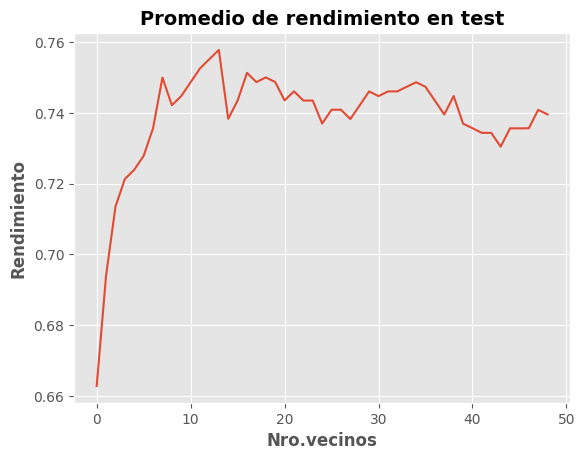

In [22]:
plt.title("Promedio de rendimiento en test", fontsize=14, fontweight="bold")
plt.xlabel("Nro.vecinos", fontsize=12, fontweight="bold")
plt.ylabel("Rendimiento", fontsize=12, fontweight="bold")
plt.plot(knn_cv.cv_results_['mean_test_score']);